# 一、資料集介紹

資料集網址：[Covid Data](https://www.kaggle.com/datasets/meirnizri/covid19-dataset)
預測問題：病患在確定得到 Covid Data 後是否會死亡
目標變數：DATE_DIED（紀錄病人死亡日期，如果沒有死亡則輸入 9999-99-99 表示。）

# 二、變數敘述統計＆資料前處理

## (一)、變數敘述統計

In [1]:
# 針對連續性變數做敘述統計
import pandas as pd

df = pd.read_csv("./covid_data.csv")
df.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


In [14]:
import pandas as pd

df = pd.read_csv("./covid_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [15]:
import pandas as pd

# 讀取資料集
df = pd.read_csv('covid_data.csv')

# 定義缺失值的條件（97 或 99）
missing_values = [97, 98, 99]

# 遍歷所有欄位，去除包含 97 或 99 的行
df_cleaned = df[~df.isin(missing_values).any(axis=1)]

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76749 entries, 5 to 1048569
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   USMER                 76749 non-null  int64 
 1   MEDICAL_UNIT          76749 non-null  int64 
 2   SEX                   76749 non-null  int64 
 3   PATIENT_TYPE          76749 non-null  int64 
 4   DATE_DIED             76749 non-null  object
 5   INTUBED               76749 non-null  int64 
 6   PNEUMONIA             76749 non-null  int64 
 7   AGE                   76749 non-null  int64 
 8   PREGNANT              76749 non-null  int64 
 9   DIABETES              76749 non-null  int64 
 10  COPD                  76749 non-null  int64 
 11  ASTHMA                76749 non-null  int64 
 12  INMSUPR               76749 non-null  int64 
 13  HIPERTENSION          76749 non-null  int64 
 14  OTHER_DISEASE         76749 non-null  int64 
 15  CARDIOVASCULAR        76749 non-null  i

In [16]:
# 將所有欄位類型列為字典
dtype_dict = {col: 'object' for col in df_cleaned.columns if col != 'AGE'}

# 使用 astype() 轉換資料類型
df_cleaned = df_cleaned.astype(dtype_dict)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76749 entries, 5 to 1048569
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   USMER                 76749 non-null  object
 1   MEDICAL_UNIT          76749 non-null  object
 2   SEX                   76749 non-null  object
 3   PATIENT_TYPE          76749 non-null  object
 4   DATE_DIED             76749 non-null  object
 5   INTUBED               76749 non-null  object
 6   PNEUMONIA             76749 non-null  object
 7   AGE                   76749 non-null  int64 
 8   PREGNANT              76749 non-null  object
 9   DIABETES              76749 non-null  object
 10  COPD                  76749 non-null  object
 11  ASTHMA                76749 non-null  object
 12  INMSUPR               76749 non-null  object
 13  HIPERTENSION          76749 non-null  object
 14  OTHER_DISEASE         76749 non-null  object
 15  CARDIOVASCULAR        76749 non-null  o

In [17]:
# 建立 IS_DIED 欄位：判斷 DATE_DIED 是否為 '9999-99-99'，是的話表示病患沒有死亡（顯示 0，反之則為 1）
df_cleaned['IS_DIED'] = df_cleaned['DATE_DIED'].apply(lambda x: 0 if x == '9999-99-99' else 1)
df_cleaned['IS_DIED'] = df_cleaned['IS_DIED'].astype('object')

# 捨棄 DATE_DIED 欄位
df_cleaned = df_cleaned.drop(columns=['DATE_DIED'])

df_cleaned["IS_DIED"].value_counts()

IS_DIED
0    52940
1    23809
Name: count, dtype: int64

In [18]:
# 針對類別型變數做敘述統計
import pandas as pd

pd.set_option('display.max_colwidth', None)

def generate_code_description(column):
    return ", ".join([f"{val}: {count}" for val, count in df_cleaned[column].value_counts().items()])

category_columns = df_cleaned.select_dtypes(include=['object']).columns
summary = pd.DataFrame({
    "Variable": category_columns,
    "Code": [generate_code_description(col) for col in category_columns],
})
summary

,Variable,Code
0,USMER,"1: 42080, 2: 34669"
1,MEDICAL_UNIT,"4: 36165, 12: 26005, 6: 5934, 9: 3141, 3: 1651, 8: 1225, 10: 1224, 5: 693, 11: 461, 7: 119, 13: 102, 2: 19, 1: 10"
2,SEX,1: 76749
3,PATIENT_TYPE,2: 76749
4,INTUBED,"2: 65111, 1: 11638"
5,PNEUMONIA,"1: 43579, 2: 33170"
6,PREGNANT,"2: 74957, 1: 1792"
7,DIABETES,"2: 52446, 1: 24303"
8,COPD,"2: 73031, 1: 3718"
9,ASTHMA,"2: 74066, 1: 2683"


## (二)、資料前處理

In [19]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

# 假設 df_cleaned 是目前的資料集
target_var = 'IS_DIED'

# 初始化列表來存儲卡方檢定結果
chi2_results = []

# 遍歷所有類別型欄位（排除目標變數 IS_DIED 本身）
for col in df_cleaned.select_dtypes(include='object').columns:
    if col != target_var:
        # 建立列聯表（Contingency Table）
        contingency_table = pd.crosstab(df_cleaned[col], df_cleaned[target_var])

        # 卡方檢定
        chi2, p, dof, _ = chi2_contingency(contingency_table)

        # 存儲結果
        chi2_results.append({
            'Feature': col,
            'Chi2 Statistic': chi2,
            'p-value': round(p, 10),
            'Degrees of Freedom': dof,
            'Significant (p < 0.05)': p < 0.05
        })

# 將結果整理為 DataFrame 並按 p-value 排序
chi2_results_df = pd.DataFrame(chi2_results).sort_values(by='p-value', ascending=True)
chi2_results_df


,Feature,Chi2 Statistic,p-value,Degrees of Freedom,Significant (p < 0.05)
0,USMER,227.752176,0.000000e+00,1,True
15,RENAL_CHRONIC,360.018659,0.000000e+00,1,True
14,OBESITY,215.454691,0.000000e+00,1,True
13,CARDIOVASCULAR,104.198497,0.000000e+00,1,True
11,HIPERTENSION,2428.562226,0.000000e+00,1,True
17,CLASIFFICATION_FINAL,5282.884017,0.000000e+00,6,True
8,COPD,187.846263,0.000000e+00,1,True
9,ASTHMA,52.049811,0.000000e+00,1,True
6,PREGNANT,621.412488,0.000000e+00,1,True
5,PNEUMONIA,3326.443461,0.000000e+00,1,True


In [13]:
import pandas as pd
import statsmodels.api as sm

df['Sleep_Quality'] = df['Sleep_Quality'].replace({'bad': 0, 'good': 1})

# 結果儲存
logit_results = []

# 對每個類別型欄位進行邏輯回歸
for col in df.columns:
    if df[col].dtype == 'category':
        continue
    
    # 合併虛擬變數與目標變數
    X = df[col]  # 添加常數項
    y = df['Sleep_Quality']
    
    # 構建邏輯回歸模型
    logit_model = sm.Logit(y, X)
    result = logit_model.fit(disp=False)
    
    # 提取 P 值
    p_values = result.pvalues[1:]  # 跳過常數項
    significant = (p_values <= 0.05).any()
    
    # 儲存結果
    logit_results.append({
        "Variable": col,
        "P-values": p_values.to_dict(),
        "Significant (P <= 0.05)": significant
    })

# 將結果整理為 DataFrame
logit_df = pd.DataFrame(logit_results)

# 顯示結果
print("邏輯回歸分析結果：")
print(logit_df)

# 篩選出有顯著影響的變數
significant_variables = logit_df[logit_df['Significant (P <= 0.05)'] == True]
print("\n顯著變數：")
print(significant_variables)


邏輯回歸分析結果：
               Variable P-values  Significant (P <= 0.05)
0            Student_ID       {}                    False
1                   Age       {}                    False
2        Sleep_Duration       {}                    False
3           Study_Hours       {}                    False
4           Screen_Time       {}                    False
5       Caffeine_Intake       {}                    False
6     Physical_Activity       {}                    False
7   Weekday_Sleep_Start       {}                    False
8   Weekend_Sleep_Start       {}                    False
9     Weekday_Sleep_End       {}                    False
10    Weekend_Sleep_End       {}                    False

顯著變數：
Empty DataFrame
Columns: [Variable, P-values, Significant (P <= 0.05)]
Index: []


In [140]:
# Basic packages always been used
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# Algorithm
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Functions for evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score,roc_curve,auc
from sklearn.metrics import RocCurveDisplay

In [141]:
for col in df.select_dtypes(include=["object"]).columns.tolist():
    print(df[col].value_counts())

Gender
Male      186
Female    166
Other     148
Name: count, dtype: int64
University_Year
3rd Year    132
2nd Year    131
1st Year    125
4th Year    112
Name: count, dtype: int64
Sleep_Quality
good      190
bad       166
normal    144
Name: count, dtype: int64


In [142]:
mapping_university_year = {"1st Year": 0, "2nd Year": 1, "3rd Year": 2, "4th Year": 3}
mapping_gender = {"Male": 0, "Female": 1, "Other": 2}
mapping_sleep_quality = {"bad": 0, "normal": 1, "good": 2}

df["Gender"] = df["Gender"].map(mapping_gender)
df["University_Year"] = df["University_Year"].map(mapping_university_year)
df["Sleep_Quality"] = df["Sleep_Quality"].map(mapping_sleep_quality)
df.drop(columns=["Student_ID"])

dummy_df = pd.get_dummies(df, columns=["Gender", "University_Year", "Sleep_Quality"], dtype=int).copy()
dummy_df.head()

,Student_ID,Age,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,...,Gender_0,Gender_1,Gender_2,University_Year_0,University_Year_1,University_Year_2,University_Year_3,Sleep_Quality_0,Sleep_Quality_1,Sleep_Quality_2
0,1,24,7.7,7.9,3.4,2,37,14.16,4.05,7.41,...,0,0,1,0,1,0,0,0,0,1
1,2,21,6.3,6.0,1.9,5,74,8.73,7.10,8.21,...,1,0,0,1,0,0,0,1,0,0
2,3,22,5.1,6.7,3.9,5,53,20.00,20.47,6.88,...,1,0,0,0,0,0,1,0,1,0
3,4,24,6.3,8.6,2.8,4,55,19.82,4.08,6.69,...,0,0,1,0,0,0,1,0,0,1
4,5,20,4.7,2.7,2.7,0,85,20.98,6.12,8.98,...,1,0,0,0,0,0,1,1,0,0


In [143]:
new_df = dummy_df.copy()
new_df.head()

y = new_df[["Sleep_Quality_0"]].copy()
x=new_df.drop(
    ["Sleep_Quality_0", "Sleep_Quality_1", "Sleep_Quality_2"],
    axis=1
).copy()

In [144]:
max_depth_range = range(1, 11)  # max_depth 從 1 到 10
max_leaf_nodes_range = range(2, 11)  # max_leaf_nodes 從 2 到 10

# 分割數據 (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=3
)

# 儲存各個 random_state 的結果
matrices = []  # 存放每個 random_state 的準確度矩陣

# 測試不同的 random_state
for random_state in [3, 30, 300]:
    x_train_tuning, x_valid, y_train_tuning, y_valid = train_test_split(
        x_train, y_train, test_size=0.2, random_state=random_state
    )

    # 建立一個空矩陣來存放準確度
    acc_matrix = np.zeros((len(max_depth_range), len(max_leaf_nodes_range)))

    for i, max_depth in enumerate(max_depth_range):
        for j, max_leaf_nodes in enumerate(max_leaf_nodes_range):
            # 初始化並訓練決策樹模型
            model_cart = DecisionTreeClassifier(
                criterion='gini',
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_leaf=1,
                random_state=4  # 固定隨機狀態以確保每次結果一致
            )
            model_cart.fit(x_train_tuning, y_train_tuning)  # 訓練模型

            # 預測並計算驗證準確度
            prediction = model_cart.predict(x_valid)
            valid_acc = accuracy_score(y_valid, prediction)
            acc_matrix[i, j] = valid_acc * 100  # 將準確度轉為百分比格式

    matrices.append(acc_matrix)

    # 印出當前 random_state 的準確度矩陣
    print(f"Random State {random_state} Accuracy Matrix:")
    print(np.round(acc_matrix, 2))
    print()

# 計算平均矩陣
average_matrix = np.mean(matrices, axis=0)

# 找出平均矩陣的最佳值與其索引
max_avg_acc = average_matrix.max()
max_avg_idx = np.unravel_index(average_matrix.argmax(), average_matrix.shape)
best_avg_depth = max_depth_range[max_avg_idx[0]]
best_avg_leaf_nodes = max_leaf_nodes_range[max_avg_idx[1]]

# 印出平均矩陣與最佳參數
print("Averaged Accuracy Matrix:")
print(np.round(average_matrix, 2))
print(f"\nBest Parameters Across All Random States:")
print(f"  Average Best max_depth: {best_avg_depth}")
print(f"  Average Best max_leaf_nodes: {best_avg_leaf_nodes}")
print(f"  Average Best Accuracy: {round(max_avg_acc, 2)}%")

Random State 3 Accuracy Matrix:
[[71.25 71.25 71.25 71.25 71.25 71.25 71.25 71.25 71.25]
 [71.25 71.25 68.75 68.75 68.75 68.75 68.75 68.75 68.75]
 [71.25 71.25 70.   67.5  68.75 66.25 66.25 66.25 66.25]
 [71.25 71.25 70.   70.   67.5  68.75 66.25 66.25 67.5 ]
 [71.25 71.25 70.   70.   66.25 63.75 65.   62.5  62.5 ]
 [71.25 71.25 70.   70.   66.25 66.25 63.75 65.   62.5 ]
 [71.25 71.25 70.   70.   66.25 66.25 65.   62.5  63.75]
 [71.25 71.25 70.   70.   66.25 66.25 65.   62.5  63.75]
 [71.25 71.25 70.   70.   66.25 66.25 65.   62.5  63.75]
 [71.25 71.25 70.   70.   66.25 66.25 65.   62.5  63.75]]

Random State 30 Accuracy Matrix:
[[75.   75.   75.   75.   75.   75.   75.   75.   75.  ]
 [75.   75.   75.   75.   75.   75.   75.   75.   75.  ]
 [75.   75.   75.   55.   56.25 56.25 56.25 56.25 56.25]
 [75.   75.   75.   55.   56.25 70.   70.   70.   70.  ]
 [75.   75.   75.   55.   56.25 70.   67.5  67.5  67.5 ]
 [75.   75.   75.   55.   56.25 70.   67.5  60.   60.  ]
 [75.   75.   75.   5

Testing ACC: 64.0
Testing f1s: 21.74
Testing pre: 50.0
Testing sen: 13.89
Testing spe: 92.19


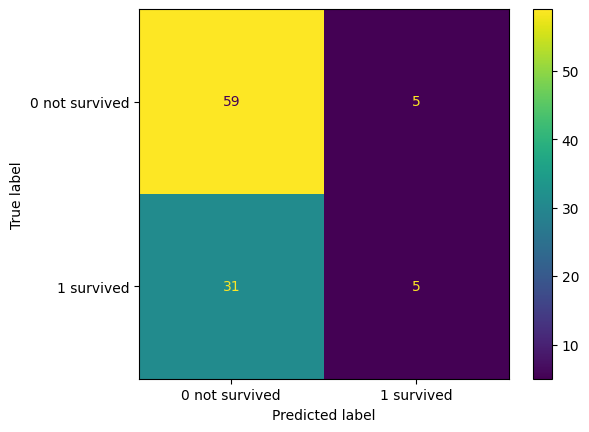

In [145]:
# 5.3 Evaluate with testing data set
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=3)

# 建立決策數
HHmodel=DecisionTreeClassifier(
    criterion='gini',
    max_depth=2,
    max_leaf_nodes=3,
    min_samples_leaf=1,
    random_state=4
)
HHmodel.fit(x_train,y_train)
final_model_testing_prediction=HHmodel.predict(x_test)
final_model_testing_acc=accuracy_score(y_test,final_model_testing_prediction)
final_model_testing_f1s=f1_score(y_test,final_model_testing_prediction,pos_label=1)
final_model_testing_pre=precision_score(y_test,final_model_testing_prediction,pos_label=1)
final_model_testing_sen=recall_score(y_test,final_model_testing_prediction,pos_label=1)
final_model_testing_spe=recall_score(y_test,final_model_testing_prediction,pos_label=0)
final_model_testing_cm=confusion_matrix(y_test,final_model_testing_prediction)

#print result
print('Testing ACC:',round(final_model_testing_acc*100,2))
print('Testing f1s:',round(final_model_testing_f1s*100,2))
print('Testing pre:',round(final_model_testing_pre*100,2))
print('Testing sen:',round(final_model_testing_sen*100,2))
print('Testing spe:',round(final_model_testing_spe*100,2))
ConfusionMatrixDisplay(final_model_testing_cm,display_labels=["0 not survived","1 survived"]).plot()